HW1 Perceptron and XOR


Implement a perceptron and train the model on an example dataset.

Dataset 1: a linearly separable dataset.

Dataset 2: a model of the XOR problem.

Extra credit: create a simple model that can be trained to solve XOR.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

Perceptron implementation


In [12]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
    
    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

Linearly Separable Dataset



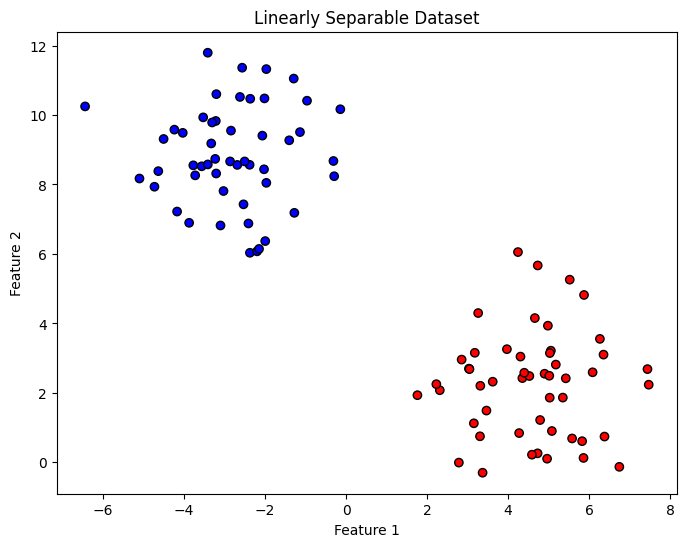

In [13]:
# Generate linearly separable data
X_linear, y_linear = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42, cluster_std=1.5)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap='bwr', edgecolor='k')
plt.title('Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [14]:
# Train Perceptron
p_linear = Perceptron(learning_rate=0.01, n_iters=1000)
p_linear.fit(X_linear, y_linear)
acc = p_linear.score(X_linear, y_linear)
print(f"Perceptron classification accuracy on linear dataset: {acc * 100:.2f}%")

Perceptron classification accuracy on linear dataset: 100.00%


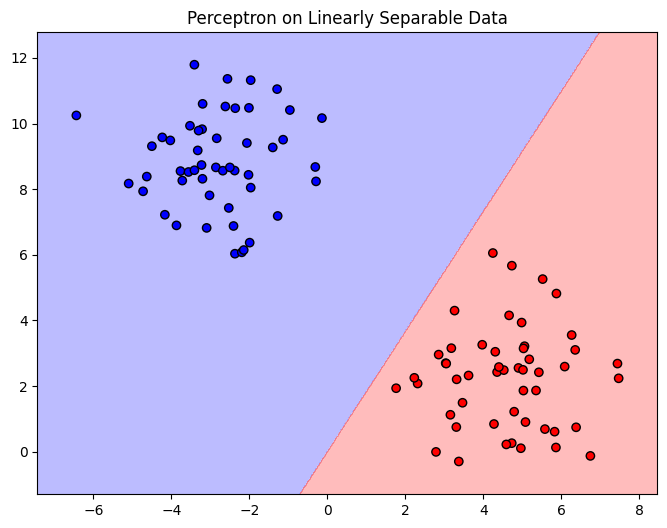

In [15]:
# Visualization function for decision boundary
def plot_decision_boundary(X, y, classifier, title):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02),
                           np.arange(x1_min, x1_max, 0.02))
    
    Z = classifier.predict(np.c_[xx0.ravel(), xx1.ravel()])
    Z = Z.reshape(xx0.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx0, xx1, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_linear, y_linear, p_linear, 'Perceptron on Linearly Separable Data')

Dataset 2: XOR Problem

Attempt at training perceptron on XOR problem

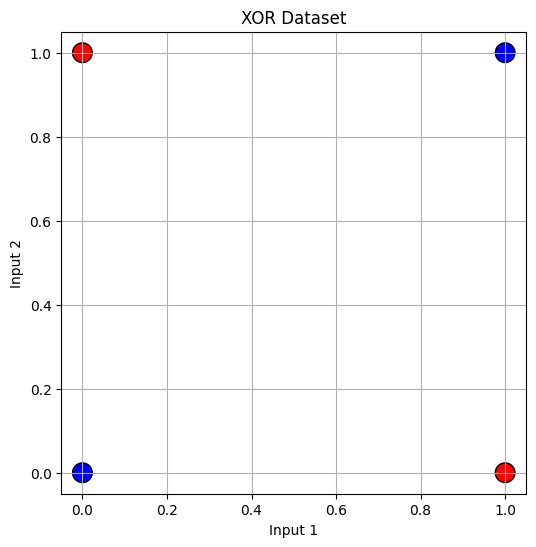

In [16]:
# XOR Data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

plt.figure(figsize=(6, 6))
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap='bwr', s=200, edgecolor='k')
plt.title('XOR Dataset')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.grid(True)
plt.show()

Perceptron classification accuracy on XOR dataset: 50.00%


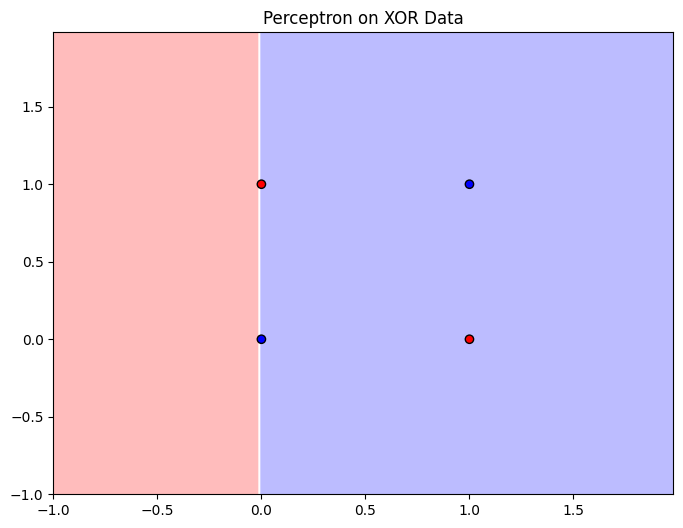

In [17]:
# Train Perceptron on XOR
p_xor = Perceptron(learning_rate=0.1, n_iters=1000)
p_xor.fit(X_xor, y_xor)
acc_xor = p_xor.score(X_xor, y_xor)
print(f"Perceptron classification accuracy on XOR dataset: {acc_xor * 100:.2f}%")

plot_decision_boundary(X_xor, y_xor, p_xor, 'Perceptron on XOR Data')

Single layer perceptron unable to classify XOR because it can only draw a straight line. XOR requires a non-linear decision boundary.

Extra Credit: Model trained to solve XOR

Non-linear activation function is required to solve XOR. Below with one hidden layer, non-linear activation function (tanh) is used.


In [18]:
class SimpleMLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize weights randomly
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        self.lr = learning_rate
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def train(self, X, y, epochs=10000):
        y = y.reshape(-1, 1)
        
        losses = []
        
        for _ in range(epochs):
            # Forward pass
            # Layer 1
            z1 = np.dot(X, self.W1) + self.b1
            a1 = self.sigmoid(z1)
            
            # Layer 2 (Output)
            z2 = np.dot(a1, self.W2) + self.b2
            output = self.sigmoid(z2)
            
            # Compute Loss (Mean Squared Error)
            error = y - output
            loss = np.mean(np.square(error))
            losses.append(loss)
            
            # Backpropagation
            # Output layer gradients
            d_output = error * self.sigmoid_derivative(output)
            
            # Hidden layer gradients
            error_hidden = d_output.dot(self.W2.T)
            d_hidden = error_hidden * self.sigmoid_derivative(a1)
            
            # Update weights and biases
            self.W2 += a1.T.dot(d_output) * self.lr
            self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.lr
            self.W1 += X.T.dot(d_hidden) * self.lr
            self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.lr
            
        return losses

    def predict(self, X):
        # Forward pass only
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self.sigmoid(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        output = self.sigmoid(z2)
        return np.where(output > 0.5, 1, 0)

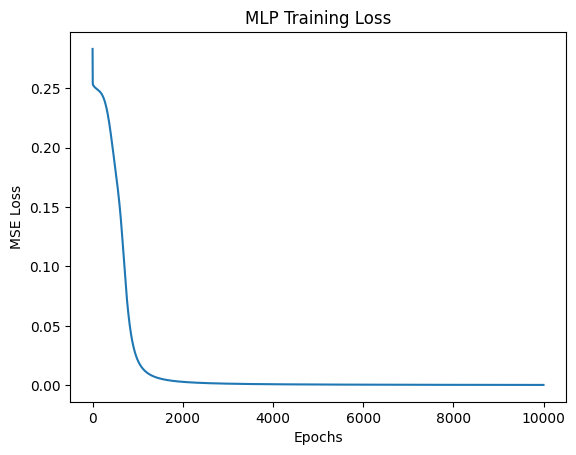

In [19]:
# Train MLP on XOR
# Architecture: 2 inputs -> 4 hidden neurons -> 1 output
mlp = SimpleMLP(input_size=2, hidden_size=4, output_size=1, learning_rate=0.5)

loss_history = mlp.train(X_xor, y_xor, epochs=10000)

# Plot Loss curve
plt.plot(loss_history)
plt.title('MLP Training Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

MLP Predictions on XOR:
Input: [0 0], Target: 0, Predicted: 0
Input: [0 1], Target: 1, Predicted: 1
Input: [1 0], Target: 1, Predicted: 1
Input: [1 1], Target: 0, Predicted: 0


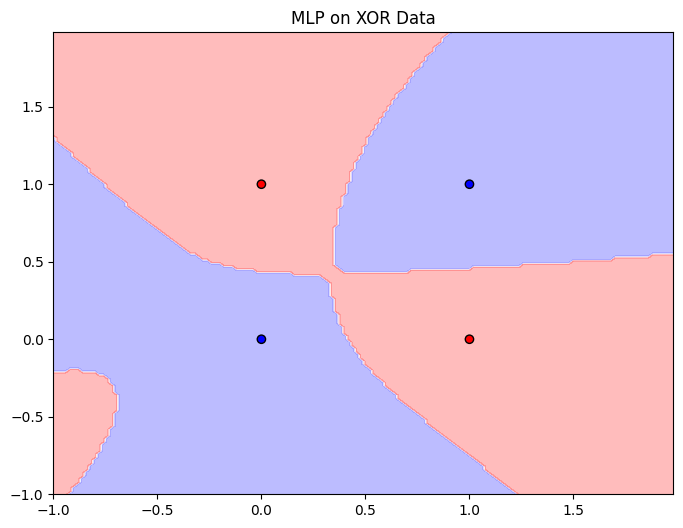

In [20]:
# Check Predictions
predictions = mlp.predict(X_xor)
print("MLP Predictions on XOR:")
for i, x in enumerate(X_xor):
    print(f"Input: {x}, Target: {y_xor[i]}, Predicted: {predictions[i][0]}")

plot_decision_boundary(X_xor, y_xor, mlp, 'MLP on XOR Data')